# Python exercises

In [136]:
# import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import StandardScaler
import statsmodels.api as sm

# load the necessary data
employees = pd.read_csv('./data/employees.csv', index_col=0)
projects = pd.read_csv('./data/projects.csv', index_col=0)
departments = pd.read_csv('./data/departments.csv', index_col=0)

## Exercise 1

**Topics covered:**
- using lists and dictionaries
- accessing data with loc and iloc

**Task:**  
Create a dictionary where each key is a dataset name and its value is the imported DataFrame. Use `loc` to display the details of the 10th to 12th employees and `iloc` to display the first 2 rows of the *projects* dataset.

**Implementation:**  
We use slicing to access the 10th to 12th employees with `loc` and `iloc` to access the first 2 projects.

In [137]:
datasets = {'employees': employees, 'projects': projects, 'departments': departments}

print('Employees from 10th to 12th:', datasets['employees'].loc[10:12], sep='\n')

print('First 2 projects:', datasets['projects'].iloc[:2], sep='\n')

Employees from 10th to 12th:
                     Name  Salary  ProjectsDone  AssignedProjectID  Bonus
EmployeeID                                                               
10            Liam Wilson    4924           4.0                  8      1
11          Sophia Martin    6524           8.0                  8      3
12             Ava Taylor    7053           6.0                  2      2
First 2 projects:
                     Title   StartDate     EndDate  Budget
ProjectID                                                 
1          Market Analysis  2021-01-01  2021-05-05   30095
2           Internal Audit  2021-02-01  2021-05-28   94756


## Exercise 2

**Topics covered:**
- modifying data
- dealing with missing values
- deleting columns and records

**Task:**  
In the employees dataset, the *ProjectsDone* column has some missing values. Fill these missing values with the average number of projects done by all employees. Delete any record where the salary is below 3k$. Lastly, remove the *Bonus* column.

**Implementation:**  
We use the `fillna` method to fill the missing values with the average (`mean`) of the *ProjectsDone* column. We then use reassignation combined with data filtering to remove the records with a salary below 3k$ and use the `drop` method to remove the *Bonus* column.

In [138]:
print('NA values in employees dataset before:', employees['ProjectsDone'].isna().sum())
employees['ProjectsDone'].fillna(employees['ProjectsDone'].mean(), inplace=True)
print('NA values in employees dataset after:', employees['ProjectsDone'].isna().sum())

print('Number of employees before:', employees.shape[0])
employees = employees[employees['Salary'] >= 4_000]
print('Number of employees after:', employees.shape[0])

print('Employees columns before:', employees.columns.values)
print('Employees columns after:', employees.drop('Bonus', axis=1).columns.values)

NA values in employees dataset before: 5
NA values in employees dataset after: 0
Number of employees before: 50
Number of employees after: 35
Employees columns before: ['Name' 'Salary' 'ProjectsDone' 'AssignedProjectID' 'Bonus']
Employees columns after: ['Name' 'Salary' 'ProjectsDone' 'AssignedProjectID']


## Exercise 3

**Topics covered:**
- processing datasets with merge/join
- statistical processing, grouping, and aggregation

**Task:**  
Merge the *employees* dataset with the *projects* dataset on the *ProjectID* to associate employees with their current projects. Using the merged dataset, calculate the average salary of employees by project title. Then, show the best employee for each bonus group based on his projects done.

**Implementation:**  
We use the `merge` method to merge the datasets on the *ProjectID* column. We then use the `groupby` method to group the data by *ProjectTitle* and calculate the average salary with the `mean` method. For the last part, we use the `groupby` method to group the data by *Bonus* and use the `idxmax` method withing an `apply` method to get the best employee who might need a raise.

In [139]:
merged_df = pd.merge(employees, projects, left_on='AssignedProjectID', right_on='ProjectID', how='inner')
print('Merged dataframe:', merged_df.head(3), sep='\n')

average_salary_by_project = merged_df.groupby('Title')['Salary'].mean()
print('Average salary by project:', average_salary_by_project.head(3), sep='\n')

best_employees = employees.groupby('Bonus').apply(lambda x: x.loc[x['ProjectsDone'].idxmax()])
print('Best employees:', best_employees, sep='\n')

Merged dataframe:
           Name  Salary  ProjectsDone  AssignedProjectID  Bonus  \
0   James Smith    6787           7.0                  6      1   
1     Raj Patel    8152           8.0                  6      1   
2  Olivia Jones    9379           3.0                  6      0   

                     Title   StartDate     EndDate  Budget  
0  Operational Improvement  2021-06-01  2021-09-05   60182  
1  Operational Improvement  2021-06-01  2021-09-05   60182  
2  Operational Improvement  2021-06-01  2021-09-05   60182  
Average salary by project:
Title
Data Analytics        6157.5
Financial Planning    7059.0
Internal Audit        5628.0
Name: Salary, dtype: float64
Best employees:
                      Name  Salary  ProjectsDone  AssignedProjectID  Bonus
Bonus                                                                     
0      Alexander Hernandez    7400           9.0                  3      0
1                Raj Patel    8152           8.0                  6      1
2   

## Exercise 4

**Topics covered:**
- using group functions
- defining and calling functions
- using conditional structures

**Task:**  
Write a function that takes any of the three datasets as input and returns a summary dictionary containing the number of rows, the mean salary (or max budget for departments), and the most common project title. Use conditional structures to handle differences between datasets.

**Implementation:**  
We define a function that takes a dataset as input and returns a dictionary with the summary statistics (`mean`, `mode`, `max`). We use conditional structures (`if` and `elif`) to handle the differences between datasets.

In [140]:
def dataset_summary(dataset_name, df):
    summary = {}
    if dataset_name == 'employees':
        summary['RowCount'] = len(df)
        summary['MeanSalary'] = df['Salary'].mean()
        summary['MostCommonProject'] = projects.loc[df['AssignedProjectID'].mode()[0], 'Title']
    elif dataset_name == 'projects':
        summary['RowCount'] = len(df)
        summary['MeanBudget'] = df['Budget'].mean()
        summary['MostCommonProject'] = df['Title'].mode()[0]
    elif dataset_name == 'departments':
        summary['RowCount'] = len(df)
        summary['MaxBudget'] = df['Budget'].max()
    else:
        summary['Error'] = "Dataset name not recognized."
    return summary

employees_summary = dataset_summary('employees', employees)
projects_summary = dataset_summary('projects', projects)
departments_summary = dataset_summary('departments', departments)

print(employees_summary)
print(projects_summary)
print(departments_summary)

{'RowCount': 35, 'MeanSalary': 7032.742857142857, 'MostCommonProject': 'Tax Strategy'}
{'RowCount': 10, 'MeanBudget': 49276.6, 'MostCommonProject': 'Operational Improvement'}
{'RowCount': 5, 'MaxBudget': 294785}


## Exercise 5

**Topics covered:**
- using sets and tuples
- using repetitive structures
- deleting columns and records

**Task:**  
Identify any duplicate records in the *employees* dataset based on *Name* and *ProjectID*. Create a set of unique project titles from the projects dataset. Using a loop, print out each unique project title and the count of employees working on each project.

**Implementation:**  
We use the `duplicated` method to identify the duplicate records and the `set` function to create a set of unique project titles. We then use a `for` loop to iterate over the set and print the project title and the count of employees working on each project.

In [141]:
duplicates = employees[employees.duplicated(subset=['Name', 'AssignedProjectID'], keep=False)]

unique_projects = set(projects['Title'])
count_employees = []

for title in unique_projects:
    count = merged_df[merged_df['Title'] == title].shape[0]
    count_employees.append(count)
    print('Project Title:', title, 'Count of Employees:', count)

Project Title: Operational Improvement Count of Employees: 15
Project Title: Data Analytics Count of Employees: 4
Project Title: Technology Implementation Count of Employees: 0
Project Title: Internal Audit Count of Employees: 3
Project Title: Tax Strategy Count of Employees: 10
Project Title: Market Analysis Count of Employees: 2
Project Title: Financial Planning Count of Employees: 1


## Exercise 6

**Topics covered:**
- graphical representation of the data

**Task:**  
Using the *merged* employees dataset and the count of employees per project from the last exercise, create a histogram of salaries and a bar chart showing the number of employees per project. Customize the plots with titles, labels, and legends.

**Implementation:**  
We use the `hist` method to create a histogram of salaries and the list from the previous exercise to create a bar chart of the number of employees per project. We then use the `title`, `xlabel`, and `ylabel` methods to customize the plots.

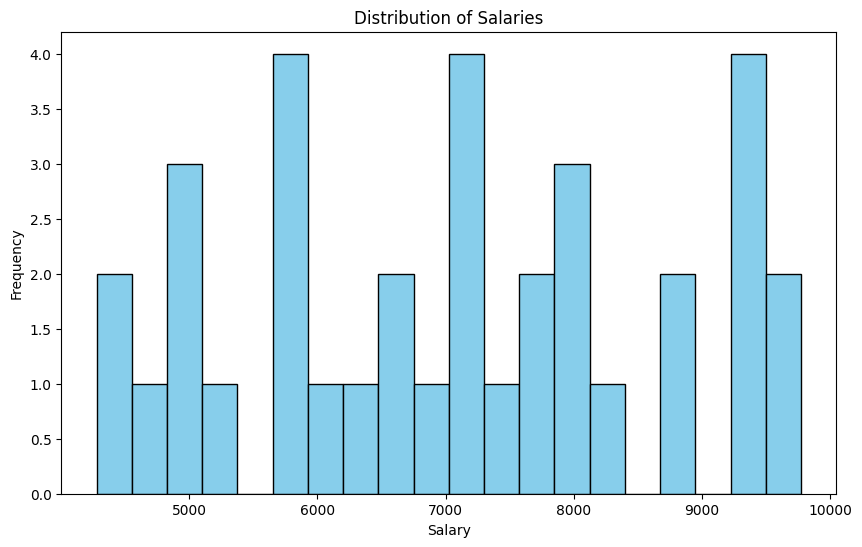

<Figure size 1500x700 with 0 Axes>

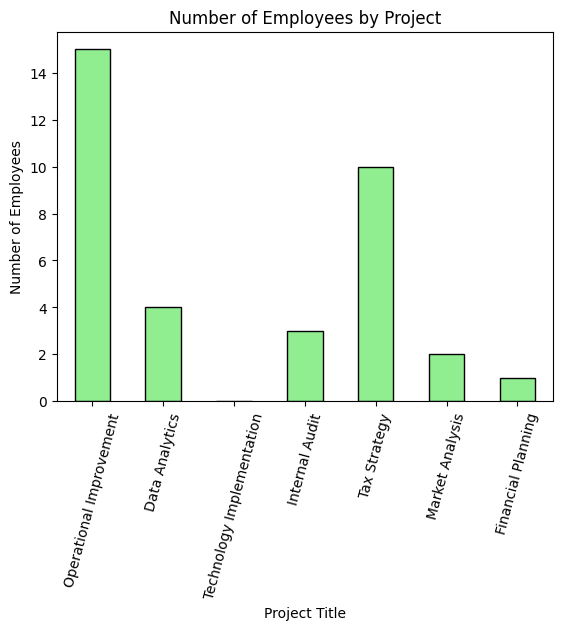

In [142]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(merged_df['Salary'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.figure(figsize=(15, 7))
pd.DataFrame(count_employees, index=list(unique_projects)).plot(kind='bar', color='lightgreen', edgecolor='black', legend=False)
plt.title('Number of Employees by Project')
plt.xlabel('Project Title')
plt.ylabel('Number of Employees')
plt.xticks(rotation=75)
plt.show()

## Exercise 7

**Topics covered:**
- using scikit-learn package (clustering, logistic regression)

**Task:**  
Perform a clustering analysis on the company's departments using their performance ratings and budget allocations.

**Implementation:**  
We use the `KMeans` class from the `sklearn.cluster` module to perform a clustering analysis on the *departments* dataset. We then use the `fit_predict` method to both fit the model and predict the clusters. Plot the results using the `scatter` method and plot the department labels using the `text` method.

C:\Users\mihal\AppData\Local\Temp\ipykernel_33416\1633996852.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(departments['Rating'][i[0]], departments['Budget'][i[0]], i[1])


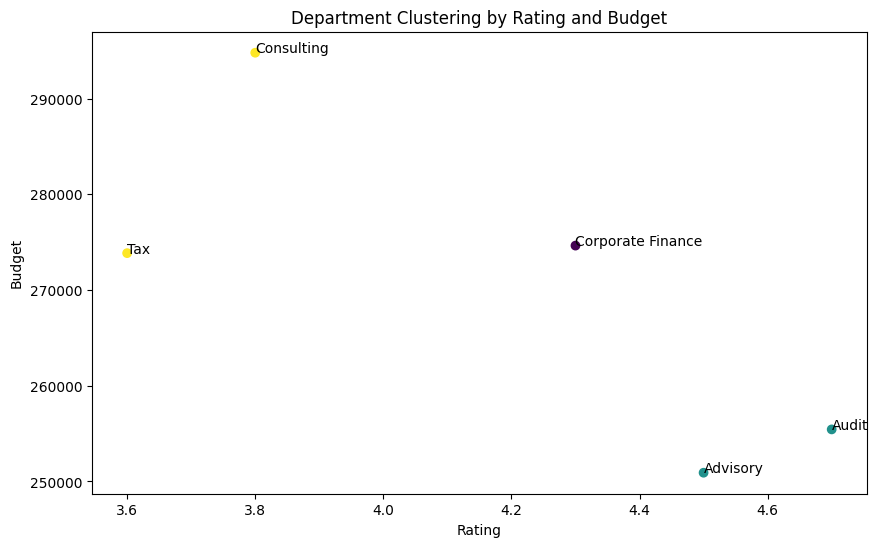

In [143]:
features = departments[['Rating', 'Budget']]
features_scaled = StandardScaler().fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=5)
departments['Cluster'] = kmeans.fit_predict(features_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(departments['Rating'], departments['Budget'], c=departments['Cluster'], cmap='viridis')
for i in enumerate(departments.index):
    plt.text(departments['Rating'][i[0]], departments['Budget'][i[0]], i[1])
plt.title('Department Clustering by Rating and Budget')
plt.xlabel('Rating')
plt.ylabel('Budget')
plt.show()

## Exercise 8

**Topics covered:**
- using statmodels package (multiple regression)

**Task:**  
Conduct a multiple regression analysis to understand the impact of salary and the number of projects done on the likelihood of an employee being rated as a 'BestEmployee' in their department. Create a binary variable for 'BestEmployee' status based on the 'BestEmployeeID' in the departments dataset.

**Implementation:**  
First we make the *IsBestEmployee* column on the employee table by using the `apply` method.
We use the `smf.ols` class from the `statsmodels` module to perform a multiple regression analysis on the *employees* dataset. We then use the `fit` method to fit the model and the `summary` method to display the results.

In [144]:
employees_1 = employees.reset_index()
employees_1['IsBestEmployee'] = employees_1['EmployeeID'].apply(lambda x: 1 if x in departments['BestEmployeeID'].values else 0)

X = employees_1[['Salary', 'ProjectsDone']]
X = sm.add_constant(X)
Y = employees_1['IsBestEmployee']

model = sm.OLS(Y, X).fit()
model_summary = model.summary()

print(model_summary)

                            OLS Regression Results                            
Dep. Variable:         IsBestEmployee   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     2.323
Date:                Sun, 03 Mar 2024   Prob (F-statistic):              0.114
Time:                        19:24:34   Log-Likelihood:                -2.7294
No. Observations:                  35   AIC:                             11.46
Df Residuals:                      32   BIC:                             16.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4562      0.261      1.750   